In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np
import pandas as pd

In [7]:
fire_data = pd.read_csv("/content/drive/MyDrive/Wildfire (1)/Datasets/merged_tp_precip_wind_fmc_all.csv")

FileNotFoundError: ignored

In [ ]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218320 entries, 0 to 218319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       218320 non-null  int64  
 1   FIRE_SIZE        218320 non-null  float64
 2   FIRE_SIZE_CLASS  218320 non-null  object 
 3   LATITUDE         218320 non-null  float64
 4   LONGITUDE        218320 non-null  float64
 5   START_DATE       218320 non-null  int64  
 6   END_DATE         218320 non-null  int64  
 7   FIPS             218320 non-null  float64
 8   DATE             218320 non-null  int64  
 9   tmax             218320 non-null  float64
 10  tmin             218320 non-null  float64
 11  tavg             218320 non-null  float64
 12  prcp             218320 non-null  float64
 13  aws              218320 non-null  float64
 14  fmc              218320 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.0+ MB


In [ ]:
fire_data.head(500)

,Unnamed: 0,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,START_DATE,END_DATE,FIPS,DATE,tmax,tmin,tavg,prcp,aws,fmc
0,0,19.080000,E,61.266670,-163.75000,20150625,20150813,2050.0,20150724,234.0,95.0,156.0,0.0,3.482546,185.0
1,1,630.727273,G,61.336940,-162.52333,20150622,20150826,2050.0,20150725,197.0,92.0,141.0,25.0,1.265158,185.0
2,2,19.080000,E,61.266670,-163.75000,20150625,20150813,2050.0,20150628,126.0,73.0,89.0,178.0,4.692081,185.0
3,3,0.012500,A,61.333330,-162.66667,20150622,20150629,2050.0,20150626,139.0,91.0,113.0,0.0,3.313608,185.0
4,4,22.588235,F,60.256950,-159.83722,20150620,20150826,2050.0,20150630,161.0,31.0,99.0,0.0,1.789728,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,630.727273,G,61.336940,-162.52333,20150622,20150826,2050.0,20150727,177.0,58.0,112.0,25.0,1.130542,185.0
496,496,339.879121,G,61.318670,-159.85467,20150623,20150921,2050.0,20150727,177.0,58.0,112.0,25.0,1.130542,185.0
497,497,22.588235,F,60.256950,-159.83722,20150620,20150826,2050.0,20150703,201.0,77.0,135.0,0.0,0.951972,185.0
498,498,347.892308,G,61.306940,-163.21750,20150623,20150826,2050.0,20150702,181.0,48.0,113.0,0.0,5.313309,185.0


<Axes: >

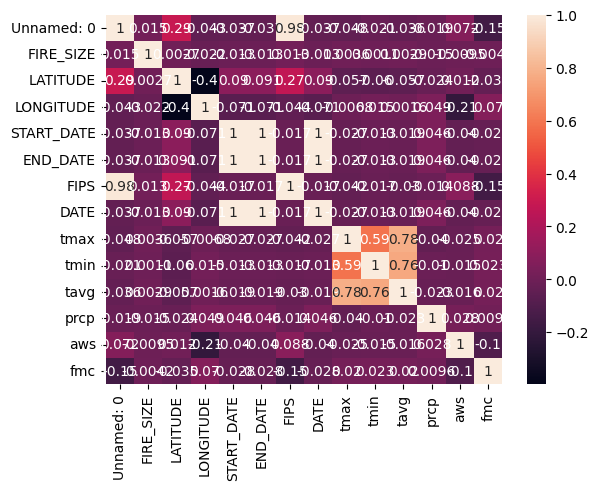

In [ ]:
sns.heatmap(fire_data.corr(numeric_only = True), annot=True)

In [ ]:

fire_data.drop(["Unnamed: 0"], axis = 1, inplace = True)
fire_data.drop(["START_DATE"], axis = 1, inplace = True)
fire_data.drop(["END_DATE"], axis = 1, inplace = True)

In [ ]:
def classify_ranges(df, column_name, ranges, classification_column):
    for range_name, range_values in ranges.items():
        df.loc[df[column_name].between(*range_values), classification_column] = range_name

# Example usage


classification_ranges = {
    'A': (0, 99),
    'B': (99.000000000001, 999),
    'C': (999.000000000001, 99999999999999)



}
  # Creating a new column to store the classifications
classify_ranges(fire_data, 'FIRE_SIZE', classification_ranges, 'FIRE_SIZE_CLASS')


In [ ]:
def classify_ranges(df, column_name, ranges, classification_column):
    for range_name, range_values in ranges.items():
        df.loc[df[column_name].between(*range_values), classification_column] = range_name

# Example usage


classification_ranges = {
    'A': (0, 0.25),
    'B': (0.25000000000001, 99999999999999)



}
  # Creating a new column to store the classifications
classify_ranges(fire_data, 'FIRE_SIZE', classification_ranges, 'FIRE_SIZE_CLASS')

In [ ]:
fire_data.drop(["FIRE_SIZE"], axis = 1, inplace = True)

In [ ]:
fire_data.groupby("FIRE_SIZE_CLASS").count()

,LATITUDE,LONGITUDE,FIPS,DATE,tmax,tmin,tavg,prcp,aws,fmc
FIRE_SIZE_CLASS,,,,,,,,,,
A,197739,197739,197739,197739,197739,197739,197739,197739,197739,197739
B,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518
C,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063


In [ ]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218320 entries, 0 to 218319
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FIRE_SIZE_CLASS  218320 non-null  object 
 1   LATITUDE         218320 non-null  float64
 2   LONGITUDE        218320 non-null  float64
 3   FIPS             218320 non-null  float64
 4   DATE             218320 non-null  int64  
 5   tmax             218320 non-null  float64
 6   tmin             218320 non-null  float64
 7   tavg             218320 non-null  float64
 8   prcp             218320 non-null  float64
 9   aws              218320 non-null  float64
 10  fmc              218320 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.3+ MB


In [ ]:
fire_data.dropna(inplace = True)
fire_data['FIRE_SIZE_CLASS'] = fire_data['FIRE_SIZE_CLASS'].replace({'A':0 , 'B':1 , 'C':2 ,'D':3 , 'E':4 , 'F':5 , 'G':6 })

In [ ]:
fire_data["DATE"] = fire_data["DATE"].astype(float)

In [ ]:
x = fire_data.drop("FIRE_SIZE_CLASS", axis=1)
y = fire_data["FIRE_SIZE_CLASS"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .3, random_state = 101)

In [ ]:
X_train = torch.tensor(X_train.values, dtype = torch.float)
Y_train = torch.tensor(Y_train.values, dtype = torch.int64)
X_test = torch.tensor(X_test.values, dtype = torch.float)
Y_test = torch.tensor(Y_test.values, dtype = torch.int64)

In [ ]:
class Softmax(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, 16)
        self.linear1 = torch.nn.Linear(16, 32)
        self.linear2 = torch.nn.Linear(32, n_outputs)

    def forward(self, x):
        x = torch.nn.functional.relu(self.linear(x))
        x = torch.nn.functional.relu(self.linear1(x))
        x = self.linear2(x)
        return torch.nn.functional.log_softmax(x, dim=1)

In [ ]:
model_softmax = Softmax(10, 3)
model_softmax.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.0474e-01, -4.2544e-02, -2.9397e-01, -2.3530e-01,  1.6957e-01,
                       -1.9539e-01, -2.1160e-01,  2.7332e-01,  4.1489e-03, -2.9900e-01],
                      [ 9.9360e-02,  2.5191e-01, -1.3240e-01,  2.6962e-01, -1.3003e-01,
                       -2.4597e-01,  1.6481e-01,  2.5174e-01,  3.1434e-01, -4.9136e-03],
                      [ 4.0716e-02, -3.1531e-01,  9.3059e-02,  1.0806e-01, -3.6451e-02,
                       -1.5361e-01, -7.8741e-02, -2.2452e-01,  6.3705e-02, -2.5425e-01],
                      [ 7.8784e-02,  5.7901e-03,  1.4305e-01, -2.1773e-01, -3.0803e-01,
                       -2.7695e-01,  1.1596e-01, -1.7276e-01,  1.5904e-01,  2.6703e-01],
                      [ 8.4161e-02, -1.6322e-01,  2.8214e-01, -1.0868e-02, -1.4980e-01,
                       -3.0078e-01,  1.5960e-01, -5.2481e-03, -3.5481e-02,  2.0149e-01],
                      [ 2.1089e-02, -2.4344e-01,  3.1554e-01, -6.8874e-02,  7.6247e-

In [ ]:
train_data = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_data, batch_size = 218320)

In [ ]:

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_softmax.parameters(), .0001)

In [ ]:
Loss = []
epochs = 1
for epoch in range(epochs):
    running_loss = 0
    for x, y in train_loader:

        optimizer.zero_grad()
        y_pred = model_softmax(x)

        loss = loss_fn(y_pred, y)
        Loss.append(loss)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch}], Loss: {running_loss/len(train_loader)}")

Epoch [0], Loss: 4.645675182342529


In [ ]:
y_pred

tensor([[-1.0436, -1.1394, -1.1154],
        [-0.9934, -1.1310, -1.1810],
        [-1.0139, -1.1508, -1.1369],
        ...,
        [-1.0312, -1.1261, -1.1422],
        [-1.0295, -1.1254, -1.1447],
        [-1.0597, -1.1303, -1.1071]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
y

tensor([1, 2, 0,  ..., 0, 0, 0])

In [ ]:
pred_model =  model_softmax(X_test)
_, y_pred = pred_model.max(1)

In [ ]:
print(y_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
correct = (Y_test == y_pred).sum().item()
acc = correct / Y_test.size(0)
print("model accuracy: ", acc)

model accuracy:  0.9043605716379626


In [ ]:
print(classification_report(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     59232
           1       0.00      0.00      0.00      5050
           2       0.00      0.00      0.00      1214

    accuracy                           0.90     65496
   macro avg       0.30      0.33      0.32     65496
weighted avg       0.82      0.90      0.86     65496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(Y_test, y_pred))

0.9043605716379626


In [ ]:
print(confusion_matrix(Y_test, y_pred))

[[57685  1547     0]
 [ 4921   129     0]
 [ 1206     8     0]]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
model_softmax.eval()

with torch.no_grad():

    actuals = Y_test.tolist()
predictions = model_softmax(X_test)
predictions = torch.tensor(predictions)
actuals = torch.tensor(actuals)

mse = mean_squared_error(actuals, y_pred)
r2 = r2_score(actuals, y_pred)
rmse = np.sqrt(mse)

print('Test MSE:', mse)
print("Test r2:", r2)
print('Test RMSE:', rmse)

Test MSE: 0.15124587761084646
Test r2: -0.09431961143516987
Test RMSE: 0.38890342967226


<ipython-input-54-2e2099014a7b>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predictions = torch.tensor(predictions)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x = fire_data.drop("FIRE_SIZE_CLASS", axis=1)
y = fire_data["FIRE_SIZE_CLASS"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, Y_train)

NameError: ignored

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
mean_squared_error(Y_test, predictions)

0.15124587761084646

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     59232
           1       0.00      0.00      0.00      5050
           2       0.00      0.00      0.00      1214

    accuracy                           0.90     65496
   macro avg       0.30      0.33      0.32     65496
weighted avg       0.82      0.90      0.86     65496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(Y_test, predictions))

[[59232     0     0]
 [ 5050     0     0]
 [ 1214     0     0]]


In [ ]:
print(accuracy_score(Y_test, predictions))

0.9043605716379626


In [ ]:
from sklearn import metrics

In [ ]:
mean_squared_error(Y_test, predictions)

0.15124587761084646

In [ ]:
r2_score(Y_test, predictions)

-0.09431961143516987

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     59232
           1       0.81      0.83      0.82      5050
           2       0.76      0.80      0.78      1214

    accuracy                           0.97     65496
   macro avg       0.85      0.87      0.86     65496
weighted avg       0.97      0.97      0.97     65496



In [ ]:
print(confusion_matrix(Y_test, y_pred_dtc))


[[58041   966   225]
 [  768  4225    57]
 [  163    67   984]]


In [ ]:
print(accuracy_score(Y_test, y_pred_dtc))


0.9655398802980335


In [ ]:
r2_score(Y_test, y_pred_dtc)

0.6232959948522179

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(fire_data.drop('FIRE_SIZE_CLASS',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(fire_data.drop('FIRE_SIZE_CLASS',axis=1))

In [ ]:
fire_data.head()

,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS,DATE,tmax,tmin,tavg,prcp,aws,fmc
0,0,61.26667,-163.75000,2050.0,20150724.0,234.0,95.0,156.0,0.0,3.482546,185.0
1,1,61.33694,-162.52333,2050.0,20150725.0,197.0,92.0,141.0,25.0,1.265158,185.0
2,0,61.26667,-163.75000,2050.0,20150628.0,126.0,73.0,89.0,178.0,4.692081,185.0
3,0,61.33333,-162.66667,2050.0,20150626.0,139.0,91.0,113.0,0.0,3.313608,185.0
4,0,60.25695,-159.83722,2050.0,20150630.0,161.0,31.0,99.0,0.0,1.789728,185.0


In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=fire_data.columns[1:])
df_feat.head()

,LATITUDE,LONGITUDE,FIPS,DATE,tmax,tmin,tavg,prcp,aws,fmc
0,4.577077,-8.603916,-1.428378,1.397330,0.016243,-0.002823,0.002964,-0.325395,0.746792,2.89447
1,4.593408,-8.390165,-1.428378,1.397352,-0.065488,-0.006848,-0.023156,0.231220,-0.731589,2.89447
2,4.577077,-8.603916,-1.428378,1.395188,-0.222325,-0.032335,-0.113706,3.637704,1.553215,2.89447
3,4.592569,-8.415142,-1.428378,1.395143,-0.193609,-0.008189,-0.071914,-0.325395,0.634158,2.89447
4,4.342410,-7.922100,-1.428378,1.395232,-0.145011,-0.088674,-0.096292,-0.325395,-0.381847,2.89447


In [ ]:
X = df_feat
y = fire_data['FIRE_SIZE_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
error_rates = []


for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

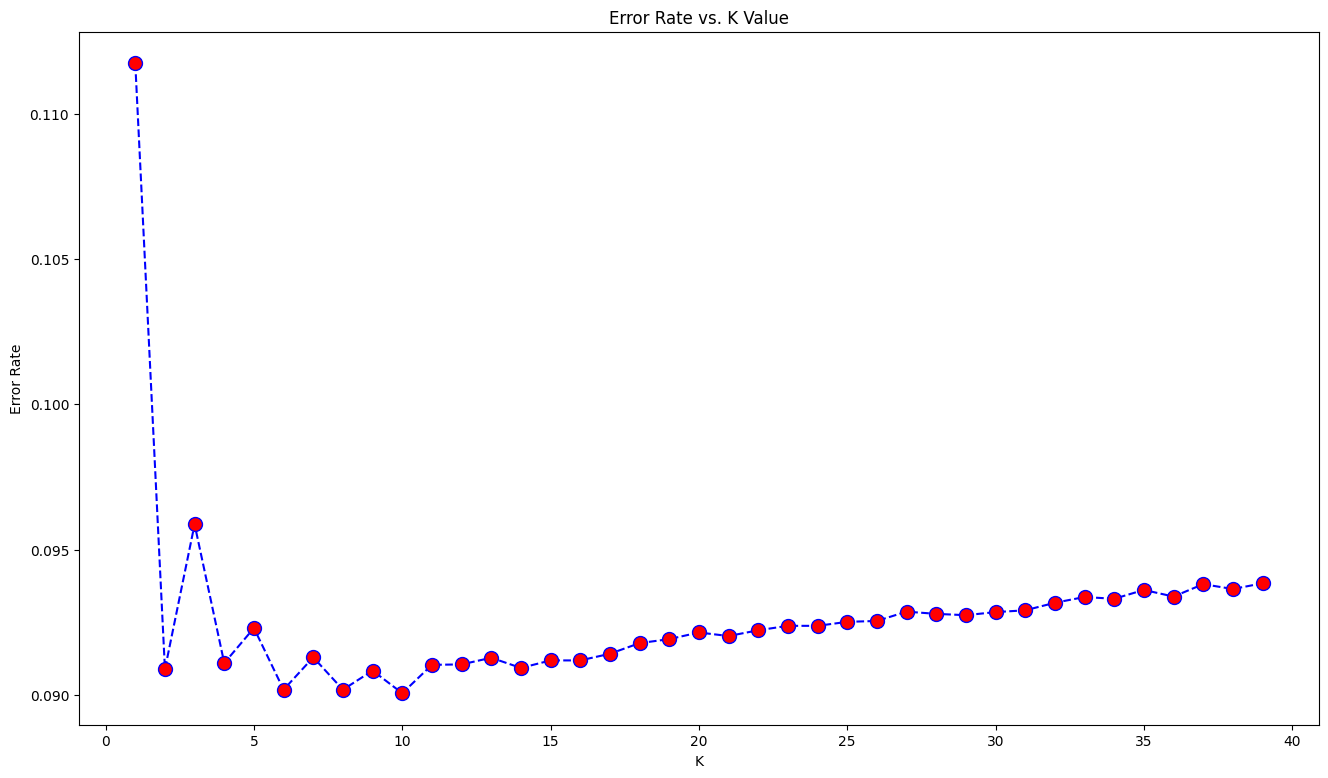

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(range(1,40), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10) # Change k as needed

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,pred))

0.9099486991572004


In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     59232
           1       0.57      0.13      0.22      5050
           2       0.59      0.23      0.33      1214

    accuracy                           0.91     65496
   macro avg       0.69      0.45      0.50     65496
weighted avg       0.89      0.91      0.88     65496



In [ ]:
print(r2_score(y_test,pred))

0.015046067478702296
